# Lab 3 Data Science
## shampoo.csv
Marco Jurado 20308 <br>
Cristian Aguirre 20231

In [92]:
# imports para todo el programa.
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn; seaborn.set()
from Def_funciones import *

### Parte 1 - Analisis Exploratorio
como primera parte cargaremos los datos y vamos a hacer un analisis exploratorio del mismo dataset.

In [93]:
data = pd.read_csv('./Datos/shampoo.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [94]:
data.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [95]:
data.tail()

,Month,Sales
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


Como podemos ver en nuestro modelo el tipo de dato de Month es un objeto por lo que es neceario convertir este mismo en un tipo de dato que podamos manipular este con un convert.

In [96]:
def parse_date (x): 
    return datetime.datetime.strptime("0"+str(x), '%y-%m') 

In [97]:
data['Month']  = data['Month'].apply(lambda x: parse_date(x))
data[['Sales']] = data[['Sales']].astype(float)
data

,Month,Sales
0,2001-01-01,266.0
1,2001-02-01,145.9
2,2001-03-01,183.1
3,2001-04-01,119.3
4,2001-05-01,180.3
5,2001-06-01,168.5
6,2001-07-01,231.8
7,2001-08-01,224.5
8,2001-09-01,192.8
9,2001-10-01,122.9


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   36 non-null     datetime64[ns]
 1   Sales   36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


Ya que tenemos la información en datos de tipo float y datetime podemos ver que en la columna de Month donde mostramos la fecha tenemos data que todas estan en el primer día de cada mes por lo tanto la información util en este caso es el año y mes de cada registro. Por lo tanto vamos a modificar este mismo.

In [99]:
data['Month'] = data['Month'].dt.strftime('%Y-%m')
data.set_index(['Month'],inplace = True)
data

,Sales
Month,
2001-01,266.0
2001-02,145.9
2001-03,183.1
2001-04,119.3
2001-05,180.3
2001-06,168.5
2001-07,231.8
2001-08,224.5
2001-09,192.8


Luego de tener la información pertinente y necesaria para el modelo podemos ver que en este caso no solo se conservo el año y mes de los registros pero se le aplico un indexado sobre estos mismos datos.

<Axes: xlabel='Month'>

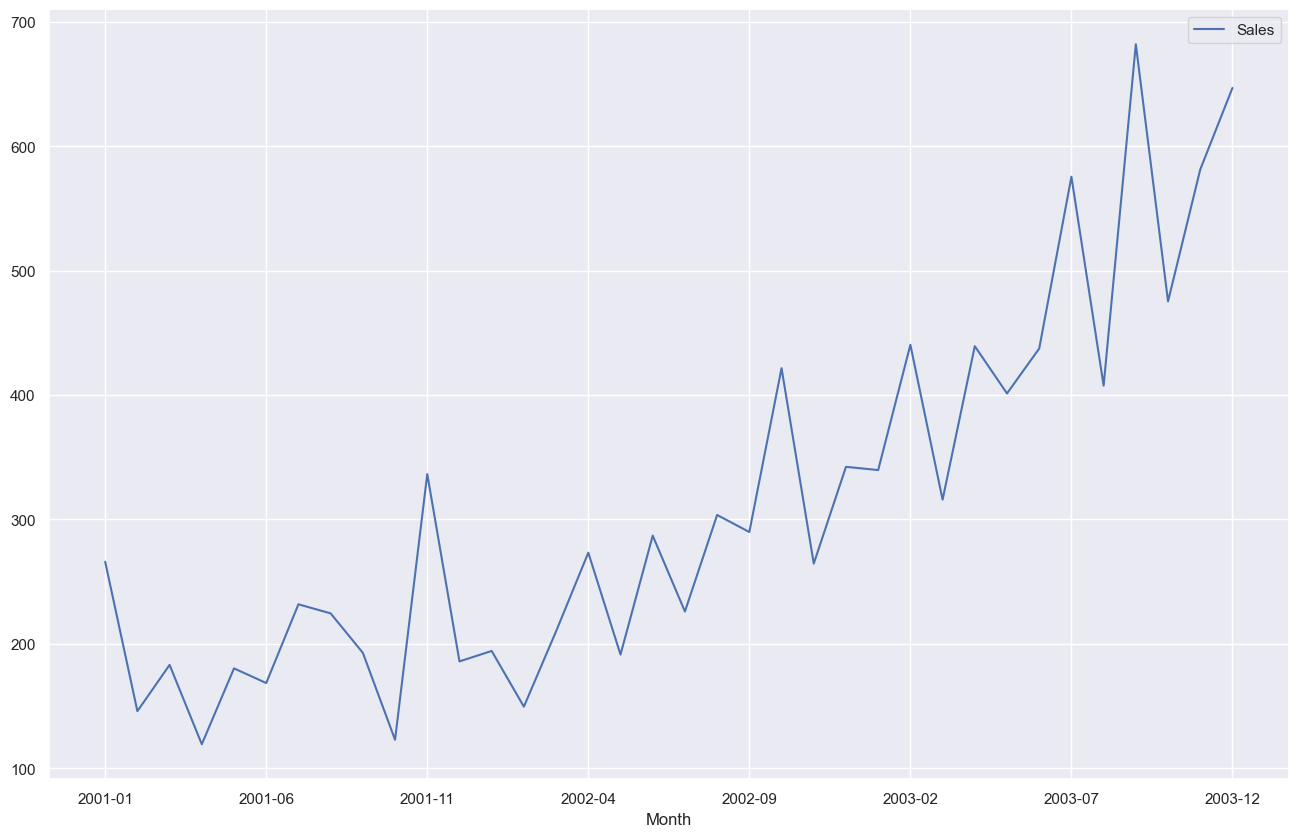

In [100]:
data.plot(figsize = (16,10))

Aqui podemos ver la tendencia de los datos en los registros de mes por año y la cantidad de ventas de shampoo. Podemos ver que si hay una posible tendencia en los datos a simple vista de su distribución. Esta tendencia se debe no solo a que este ejemplo trata de ventas de un producto en el mercado si no que al paso del tiempo en el mismo mercado se pueden dar fluctuaciones en el precio, competencia, demanda e innovación en procucción del mismo.

Ahora procederemos a dividir el modelo en set de entreno y prueba pero sin hacer uso de sklearn por el simple motivo de que estamos evaluando una serie de tiempo. Es importante recordar que al tratarse de una serie de tiempo no podemos "barajear" los datos pues el orden que estos se encuentran tiene importantcia más en un ejemplo con tendencia sobre el tiempo como lo es la venta de shampoo de nuestro data set.

In [102]:
def encontrar_mejor_solucion(datos, nombre, tipo, muestra = False):
    resultados = []

    n_prueba = int(len(datos) * 0.2)
    long_max = len(datos) - n_prueba
    print(f" >> Tamaño Entrenamiento {long_max}")
    print(f" >> Tamaño Prueba {n_prueba}")

    if tipo == "sarima":
        lista_cfg = config_sarima()
    elif tipo == "promedio":
        lista_cfg = config_simple(long_max)
    elif tipo == "alisamiento":
        lista_cfg = config_alisamiento_exp()
        datos = datos[:,0]
    elif tipo == "prophet":
        pass
    elif tipo == "neuronal":
        pass

    # muestrear algunos
    if muestra:
        lista_cfg_azar = random.sample(lista_cfg, k = 25)
        while len(resultados) < 5:
            lista_cfg_azar = random.sample(lista_cfg, k = 25)
            resultados += busqueda_malla(datos, lista_cfg_azar, n_prueba, metodo)
    else:
        # búsqueda en malla
        resultados = busqueda_malla(datos, lista_cfg, n_prueba, metodo)

    # ordenan las configuraciones por error, ascendente
    resultados.sort(key = lambda tup: tup[1])


    print('terminado')
    # listar las mejores 3 configuraciones
    for cfg, error, predicciones in resultados[:3]:
        print(cfg, error)

    # desplegar
    entreno, prueba = division_entreno_prueba(datos, n_prueba)
    prediccion = pd.DataFrame(list(entreno.flatten()) + resultados[0][2])
    ax = pd.DataFrame(datos).plot(label = "Original") # Datos originales
    prediccion.plot(ax = ax, alpha = .7, figsize = (14,7))
    # Esconder las líneas de malla de la gráfica
    # ax.grid(False)

    # Esconder las marcas en los ejes
    #ax.set_xticks([])
    #ax.set_yticks([])
    
    plt.savefig(f"{nombre}_{metodo}.png", transparent = True)
    plt.show()

### Parte 2 - Promedios

In [104]:
encontrar_mejor_solucion(data, "shampoo", "promedio")
encontrar_mejor_solucion(data, "shampoo", "sarima")
encontrar_mejor_solucion(data, "shampoo", "alisamiento")

 >> Tamaño Entrenamiento 29
 >> Tamaño Prueba 7
 >> Tamaño Entrenamiento 29
 >> Tamaño Prueba 7
 >> Tamaño Entrenamiento 29
 >> Tamaño Prueba 7


InvalidIndexError: (slice(None, None, None), 0)

### Parte 3 - SARIMA

### Parte 4 - Alisamiento Exponencial

### Parte 5 - Prophet

### Parte 6 - Redes Neuronales

### Parte 7 - Evaluación